In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
%matplotlib inline

In [44]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')
data = data.drop(['id'], axis=1)

In [45]:
#General data info
data.head()

,CPU,throughput
0,0.253936,147086.843821
1,0.194142,115328.056848
2,0.663091,330640.702664
3,0.242853,141316.060914
4,0.711971,349469.613457


In [46]:
data.describe()

,CPU,throughput
count,3000.000000,3000.000000
mean,0.491246,247199.026358
std,0.288399,128911.003490
min,0.000749,486.536854
25%,0.231597,135402.562872
50%,0.495259,261494.824533
75%,0.737133,358953.452330
max,0.999893,450510.963985


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
CPU           3000 non-null float64
throughput    3000 non-null float64
dtypes: float64(2)
memory usage: 47.0 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


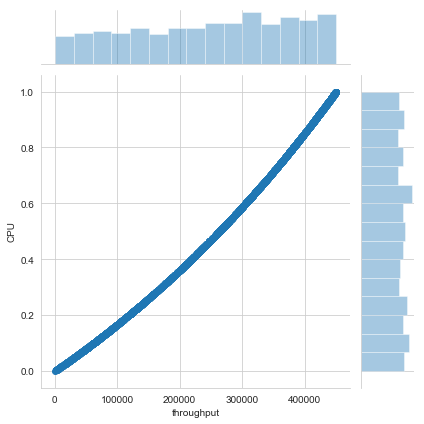

In [48]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


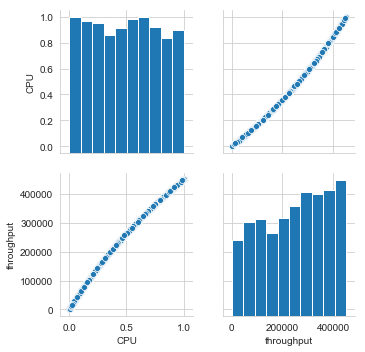

In [49]:
sns.pairplot(data)


In [50]:
data['throughput'].corr(data['CPU'])


0.9960659217448959

In [51]:
datalm = data


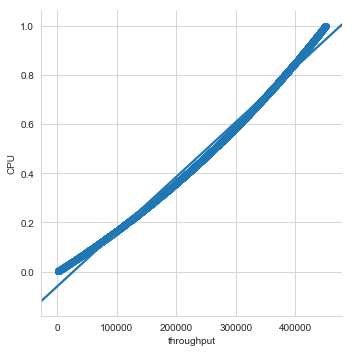

In [52]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [53]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
print(lm.coef_)


[2.22730622e-06]


In [55]:
#Test data prediction
prediction = lm.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,0.073283,0.042774
1,0.463304,0.491541
2,0.272196,0.288925
3,0.914440,0.880591
4,0.442655,0.470966
5,0.843898,0.826239
6,0.929033,0.891585
7,0.177059,0.176398
8,0.546744,0.571826
9,0.487492,0.515276


Text(0, 0.5, 'Predicted Y')

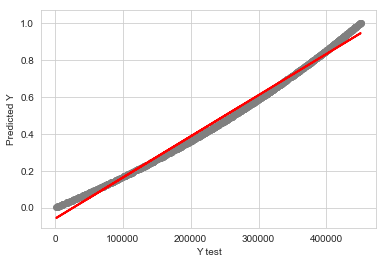

In [56]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


In [57]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.022249283812605145
MSE: 0.0006645118919374231
RMSE: 0.025778128169776468


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


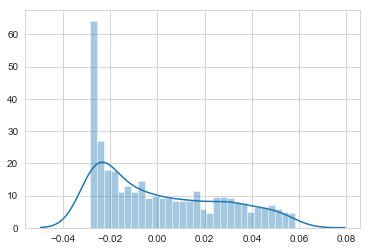

In [58]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [59]:
# save the model to disk
filename = '../models/linearReg_model.sav'
pickle.dump(lm, open(filename, 'wb'))